In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from acquire import get_telco_data
from prepare import prep_telco
from prepare import split

In [2]:
df = get_telco_data()


In [3]:
df.head()


,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,2,1,1,1,0015-UOCOJ,Female,1,No,No,7,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,3,1,1,1,0023-HGHWL,Male,1,No,No,1,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


In [4]:
df = prep_telco(df)

In [5]:
df.head()

,senior_citizen,tenure,monthly_charges,total_charges,male,partner,dependents,phone_service,multiple_lines,no_internet_service,...,churn,one_year,two_year,fiber_optic,credit_card,electric_check,mailed_check,online_backup,live_alone,new_customer
0,0,9,59.9,542.40,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,True,False
1,0,9,69.4,571.45,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,False,False
2,1,7,48.2,340.35,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,True,False
3,1,1,25.1,25.10,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,True,True
4,0,1,30.5,30.50,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,False,True


In [6]:
train, validate, test = split(df)

In [7]:
train. head()

,senior_citizen,tenure,monthly_charges,total_charges,male,partner,dependents,phone_service,multiple_lines,no_internet_service,...,churn,one_year,two_year,fiber_optic,credit_card,electric_check,mailed_check,online_backup,live_alone,new_customer
6058,0,58,19.55,1108.80,1,1,1,1,0,1,...,0,1,0,0,0,1,0,0,False,False
4085,1,17,92.55,1614.70,0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,False,False
3497,0,27,94.55,2724.60,0,0,0,1,1,0,...,1,0,0,1,0,0,1,0,True,False
4271,1,37,76.25,2841.55,0,0,0,1,1,0,...,1,0,0,1,0,1,0,0,True,False
2672,0,7,73.60,520.00,1,0,0,1,1,0,...,1,0,0,1,0,1,0,0,True,False


In [8]:
train.shape

(3943, 26)

# Explore the Target

In [9]:
train.churn.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

Text(0.5, 0, 'Churned')

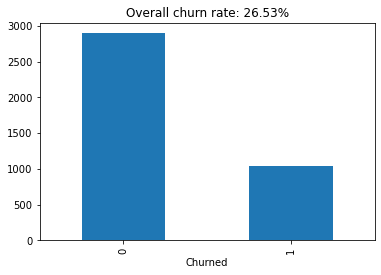

In [10]:
train.churn.value_counts().sort_index().plot.bar()
churn_rate = train.churn.mean()
plt.title(f"Overall churn rate: {churn_rate:.2%}")
plt.xlabel('Churned')

In [11]:
list(train.columns)

['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'male',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'no_internet_service',
 'online_security',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless',
 'churn',
 'one_year',
 'two_year',
 'fiber_optic',
 'credit_card',
 'electric_check',
 'mailed_check',
 'online_backup',
 'live_alone',
 'new_customer']

## Univariate Stats

In [12]:
import explore

In [13]:
cat_vars = ['churn', 'senior_citizen', 'male', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'no_internet_service', 'online_security', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless', 'one_year', 'two_year', 'fiber_optic', 'credit_card', 'electric_check', 'mailed_check', 'online_backup', 'live_alone', 'new_customer']
quant_vars = ['tenure', 'monthly_charges', 'total_charges']

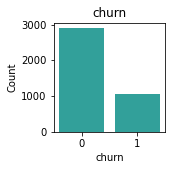

   churn  Count  Percent
0      0   2897    73.47
1      1   1046    26.53
_________________________________________________________________


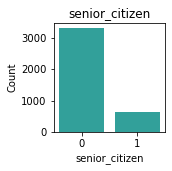

   senior_citizen  Count  Percent
0               0   3316     84.1
1               1    627     15.9
_________________________________________________________________


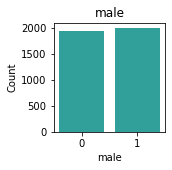

   male  Count  Percent
1     1   1996    50.62
0     0   1947    49.38
_________________________________________________________________


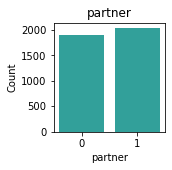

   partner  Count  Percent
0        1   2034    51.59
1        0   1909    48.41
_________________________________________________________________


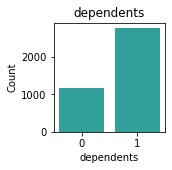

   dependents  Count  Percent
0           1   2775    70.38
1           0   1168    29.62
_________________________________________________________________


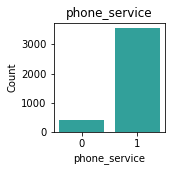

   phone_service  Count  Percent
1              1   3550    90.03
0              0    393     9.97
_________________________________________________________________


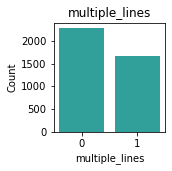

   multiple_lines  Count  Percent
0               0   2276    57.72
1               1   1667    42.28
_________________________________________________________________


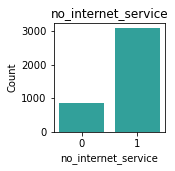

   no_internet_service  Count  Percent
0                    1   3090    78.37
1                    0    853    21.63
_________________________________________________________________


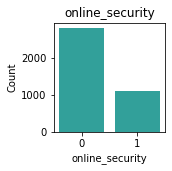

   online_security  Count  Percent
0                0   2817    71.44
1                1   1126    28.56
_________________________________________________________________


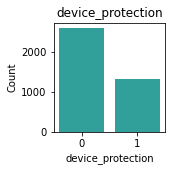

   device_protection  Count  Percent
0                  0   2602    65.99
1                  1   1341    34.01
_________________________________________________________________


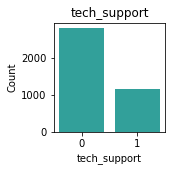

   tech_support  Count  Percent
0             0   2784    70.61
1             1   1159    29.39
_________________________________________________________________


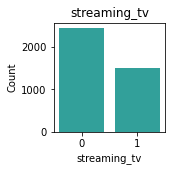

   streaming_tv  Count  Percent
0             0   2441    61.91
1             1   1502    38.09
_________________________________________________________________


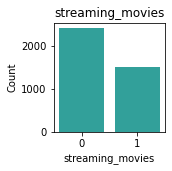

   streaming_movies  Count  Percent
0                 0   2421     61.4
1                 1   1522     38.6
_________________________________________________________________


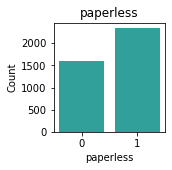

   paperless  Count  Percent
1          1   2341    59.37
0          0   1602    40.63
_________________________________________________________________


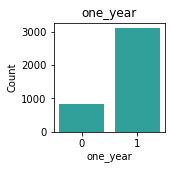

   one_year  Count  Percent
0         1   3109    78.85
1         0    834    21.15
_________________________________________________________________


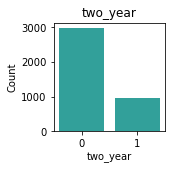

   two_year  Count  Percent
0         0   2980    75.58
1         1    963    24.42
_________________________________________________________________


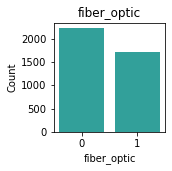

   fiber_optic  Count  Percent
0            0   2227    56.48
1            1   1716    43.52
_________________________________________________________________


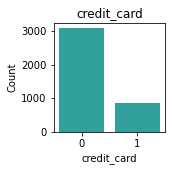

   credit_card  Count  Percent
0            0   3083    78.19
1            1    860    21.81
_________________________________________________________________


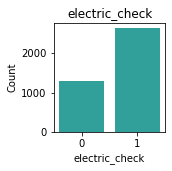

   electric_check  Count  Percent
0               1   2636    66.85
1               0   1307    33.15
_________________________________________________________________


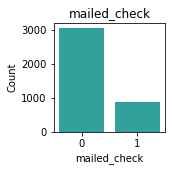

   mailed_check  Count  Percent
0             0   3049    77.33
1             1    894    22.67
_________________________________________________________________


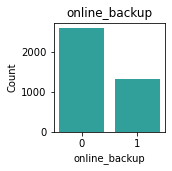

   online_backup  Count  Percent
0              0   2605    66.07
1              1   1338    33.93
_________________________________________________________________


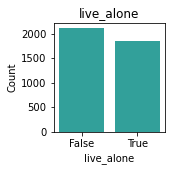

       live_alone  Count  Percent
False       False   2105    53.39
True         True   1838    46.61
_________________________________________________________________


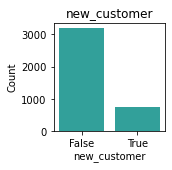

       new_customer  Count  Percent
False         False   3196    81.06
True           True    747    18.94
_________________________________________________________________


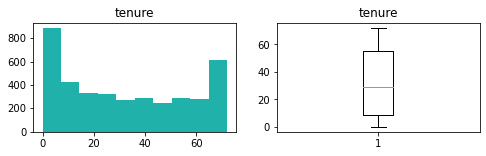

count    3943.000000
mean       32.496069
std        24.489717
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


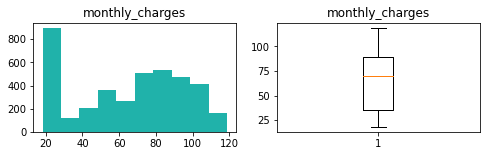

count    3943.000000
mean       64.511299
std        29.956369
min        18.250000
25%        35.500000
50%        70.150000
75%        89.550000
max       118.750000
Name: monthly_charges, dtype: float64


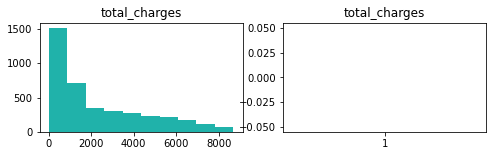

count    3935.000000
mean     2272.983926
std      2241.191111
min        18.800000
25%       421.250000
50%      1398.600000
75%      3776.975000
max      8684.800000
Name: total_charges, dtype: float64


In [14]:
explore.explore_univariate(train, cat_vars, quant_vars)


### Takeaways

- only 26% of customers have churned, baseline will be that customers have not churned

- largest concentration of customers have less than 5 months in their tenure


## Bivariate Stats

In [15]:
print(cat_vars)
print(quant_vars)

['churn', 'senior_citizen', 'male', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'no_internet_service', 'online_security', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless', 'one_year', 'two_year', 'fiber_optic', 'credit_card', 'electric_check', 'mailed_check', 'online_backup', 'live_alone', 'new_customer']
['tenure', 'monthly_charges', 'total_charges']


In [16]:
cat_vars = cat_vars[1:]
# remove target variable from list

senior_citizen 
_____________________

         chi2       p-value  degrees of freedom
0  120.250733  5.574962e-28                   1

observed:
 churn              0     1   All
senior_citizen                  
0               2548   768  3316
1                349   278   627
All             2897  1046  3943

expected:
              0           1
0  2436.330713  879.669287
1   460.669287  166.330713


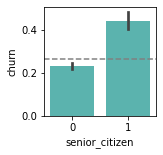


_____________________

male 
_____________________

       chi2   p-value  degrees of freedom
0  0.879666  0.348293                   1

observed:
 churn     0     1   All
male                   
0      1417   530  1947
1      1480   516  1996
All    2897  1046  3943

expected:
              0           1
0  1430.499366  516.500634
1  1466.500634  529.499366


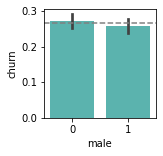


_____________________

partner 
_____________________

       chi2       p-value  degrees of freedom
0  80.00663  3.731555e-19                   1

observed:
 churn       0     1   All
partner                  
0        1370   664  2034
1        1527   382  1909
All      2897  1046  3943

expected:
              0           1
0  1494.419985  539.580015
1  1402.580015  506.419985


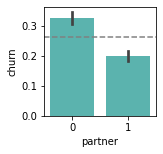


_____________________

dependents 
_____________________

       chi2       p-value  degrees of freedom
0  94.96286  1.939909e-22                   1

observed:
 churn          0     1   All
dependents                  
0           1915   860  2775
1            982   186  1168
All         2897  1046  3943

expected:
              0           1
0  2038.847324  736.152676
1   858.152676  309.847324


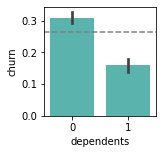


_____________________

phone_service 
_____________________

       chi2   p-value  degrees of freedom
0  0.000869  0.976477                   1

observed:
 churn             0     1   All
phone_service                  
0               288   105   393
1              2609   941  3550
All            2897  1046  3943

expected:
              0           1
0   288.744864  104.255136
1  2608.255136  941.744864


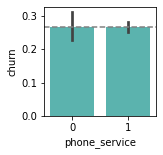


_____________________

multiple_lines 
_____________________

       chi2   p-value  degrees of freedom
0  9.085024  0.002577                   1

observed:
 churn              0     1   All
multiple_lines                  
0               1714   562  2276
1               1183   484  1667
All             2897  1046  3943

expected:
              0           1
0  1672.222166  603.777834
1  1224.777834  442.222166


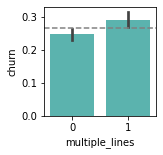


_____________________

no_internet_service 
_____________________

         chi2       p-value  degrees of freedom
0  237.165527  1.632158e-53                   1

observed:
 churn                   0     1   All
no_internet_service                  
0                    2094   996  3090
1                     803    50   853
All                  2897  1046  3943

expected:
              0           1
0  2270.284048  819.715952
1   626.715952  226.284048


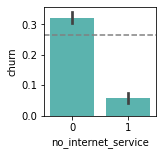


_____________________

online_security 
_____________________

        chi2       p-value  degrees of freedom
0  80.297796  3.220281e-19                   1

observed:
 churn               0     1   All
online_security                  
0                1957   860  2817
1                 940   186  1126
All              2897  1046  3943

expected:
              0           1
0  2069.705554  747.294446
1   827.294446  298.705554


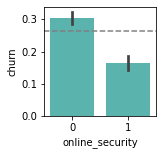


_____________________

device_protection 
_____________________

       chi2   p-value  degrees of freedom
0  14.63448  0.000131                   1

observed:
 churn                 0     1   All
device_protection                  
0                  1861   741  2602
1                  1036   305  1341
All                2897  1046  3943

expected:
              0           1
0  1911.740806  690.259194
1   985.259194  355.740806


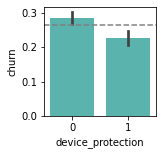


_____________________

tech_support 
_____________________

         chi2       p-value  degrees of freedom
0  112.511387  2.760748e-26                   1

observed:
 churn            0     1   All
tech_support                  
0             1911   873  2784
1              986   173  1159
All           2897  1046  3943

expected:
              0           1
0  2045.459802  738.540198
1   851.540198  307.459802


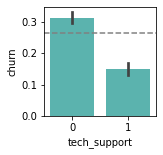


_____________________

streaming_tv 
_____________________

        chi2       p-value  degrees of freedom
0  29.443665  5.756589e-08                   1

observed:
 churn            0     1   All
streaming_tv                  
0             1867   574  2441
1             1030   472  1502
All           2897  1046  3943

expected:
              0           1
0  1793.450926  647.549074
1  1103.549074  398.450926


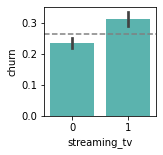


_____________________

streaming_movies 
_____________________

       chi2   p-value  degrees of freedom
0  15.85777  0.000068                   1

observed:
 churn                0     1   All
streaming_movies                  
0                 1833   588  2421
1                 1064   458  1522
All               2897  1046  3943

expected:
              0           1
0  1778.756531  642.243469
1  1118.243469  403.756531


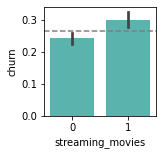


_____________________

paperless 
_____________________

         chi2       p-value  degrees of freedom
0  133.776937  6.113204e-31                   1

observed:
 churn         0     1   All
paperless                  
0          1335   267  1602
1          1562   779  2341
All        2897  1046  3943

expected:
             0          1
0  1177.02105  424.97895
1  1719.97895  621.02105


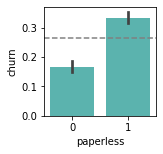


_____________________

one_year 
_____________________

         chi2       p-value  degrees of freedom
0  110.010643  9.746605e-26                   1

observed:
 churn        0     1   All
one_year                  
0         2165   944  3109
1          732   102   834
All       2897  1046  3943

expected:
              0           1
0  2284.243723  824.756277
1   612.756277  221.243723


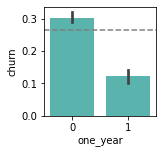


_____________________

two_year 
_____________________

       chi2       p-value  degrees of freedom
0  366.3477  1.167948e-81                   1

observed:
 churn        0     1   All
two_year                  
0         1961  1019  2980
1          936    27   963
All       2897  1046  3943

expected:
              0           1
0  2189.464874  790.535126
1   707.535126  255.464874


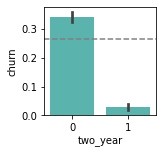


_____________________

fiber_optic 
_____________________

         chi2       p-value  degrees of freedom
0  392.456269  2.416288e-87                   1

observed:
 churn           0     1   All
fiber_optic                  
0            1909   318  2227
1             988   728  1716
All          2897  1046  3943

expected:
              0           1
0  1636.220898  590.779102
1  1260.779102  455.220898


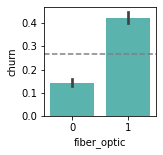


_____________________

credit_card 
_____________________

        chi2       p-value  degrees of freedom
0  62.687022  2.423070e-15                   1

observed:
 churn           0     1   All
credit_card                  
0            2174   909  3083
1             723   137   860
All          2897  1046  3943

expected:
              0           1
0  2265.141009  817.858991
1   631.858991  228.141009


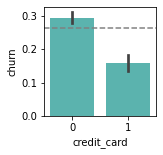


_____________________

electric_check 
_____________________

        chi2       p-value  degrees of freedom
0  369.28403  2.679682e-82                   1

observed:
 churn              0     1   All
electric_check                  
0               2188   448  2636
1                709   598  1307
All             2897  1046  3943

expected:
              0           1
0  1936.721278  699.278722
1   960.278722  346.721278


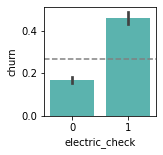


_____________________

mailed_check 
_____________________

        chi2       p-value  degrees of freedom
0  42.485825  7.119634e-11                   1

observed:
 churn            0     1   All
mailed_check                  
0             2164   885  3049
1              733   161   894
All           2897  1046  3943

expected:
              0           1
0  2240.160538  808.839462
1   656.839462  237.160538


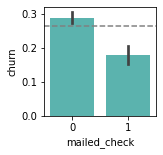


_____________________

online_backup 
_____________________

        chi2   p-value  degrees of freedom
0  17.204885  0.000034                   1

observed:
 churn             0     1   All
online_backup                  
0              1859   746  2605
1              1038   300  1338
All            2897  1046  3943

expected:
              0           1
0  1913.944966  691.055034
1   983.055034  354.944966


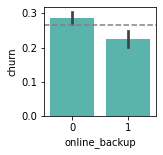


_____________________

live_alone 
_____________________

        chi2       p-value  degrees of freedom
0  86.897816  1.142755e-20                   1

observed:
 churn          0     1   All
live_alone                  
False       1676   429  2105
True        1221   617  1838
All         2897  1046  3943

expected:
              0           1
0  1546.585087  558.414913
1  1350.414913  487.585087


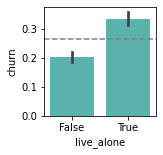


_____________________

new_customer 
_____________________

         chi2       p-value  degrees of freedom
0  350.348184  3.558916e-78                   1

observed:
 churn            0     1   All
new_customer                  
False         2552   644  3196
True           345   402   747
All           2897  1046  3943

expected:
              0           1
0  2348.164342  847.835658
1   548.835658  198.164342


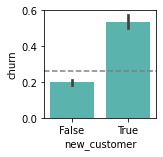


_____________________

tenure 
____________________



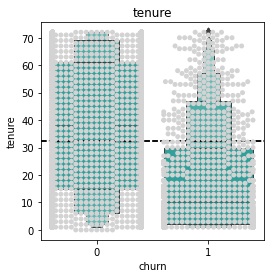

        count       mean        std  min   25%   50%   75%   max
churn                                                           
0      2897.0  37.525026  24.123835  0.0  15.0  38.0  61.0  72.0
1      1046.0  18.567878  19.629601  1.0   2.0  10.0  30.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2217615.0, pvalue=7.098198618106623e-110)

____________________

monthly_charges 
____________________



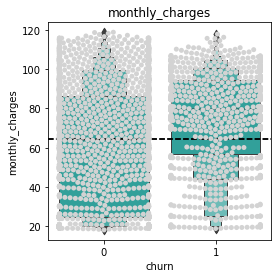

        count       mean        std    min     25%    50%     75%     max
churn                                                                    
0      2897.0  60.738678  30.894949  18.25  25.000  63.75  86.450  118.75
1      1046.0  74.959943  24.315192  18.95  56.775  79.60  94.525  117.80 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1113521.0, pvalue=4.247608494347354e-37)

____________________

total_charges 
____________________



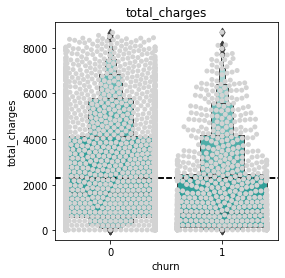

        count         mean          std   min     25%     50%        75%  \
churn                                                                      
0      2889.0  2521.043856  2301.330562  18.8  583.00  1641.3  4156.8000   
1      1046.0  1587.854732  1905.988971  19.1  147.75   764.0  2467.5875   

           max  
churn           
0      8672.45  
1      8684.80   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1942241.5, pvalue=9.869554091302749e-42)

____________________



In [17]:
explore.explore_bivariate(train, 'churn', cat_vars, quant_vars)

### Takeaways

- new customers are likely to churn

- customers who live alone are likely to churn

## Multivariate Stats & Analysis

In [18]:
target = 'churn'

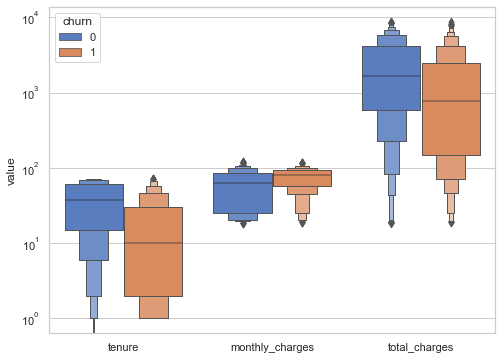

In [19]:
explore.plot_all_continuous_vars(train, target, quant_vars)

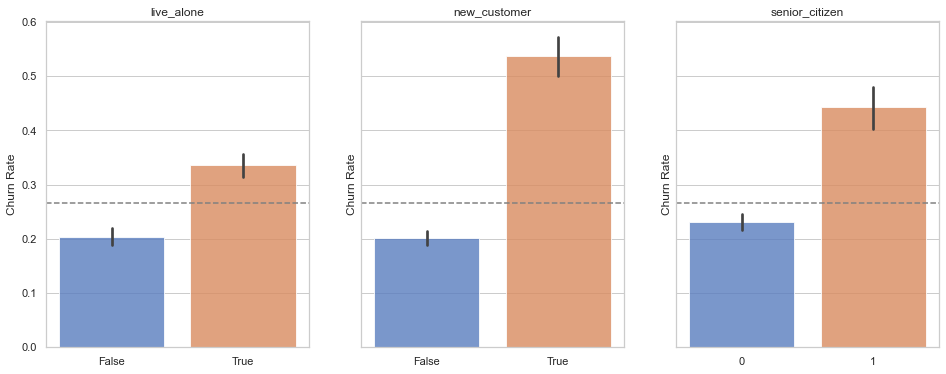

In [20]:
features = ['live_alone', 'new_customer', 'senior_citizen']

survival_rate = train.churn.mean()
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(survival_rate, ls='--', color='grey')

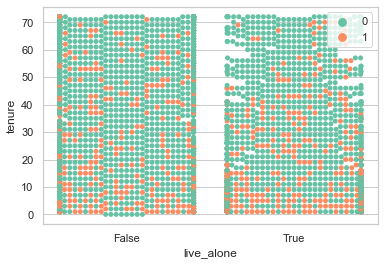

In [21]:
sns.swarmplot(x="live_alone", y="tenure", data=train, hue="churn", palette="Set2")
plt.legend()

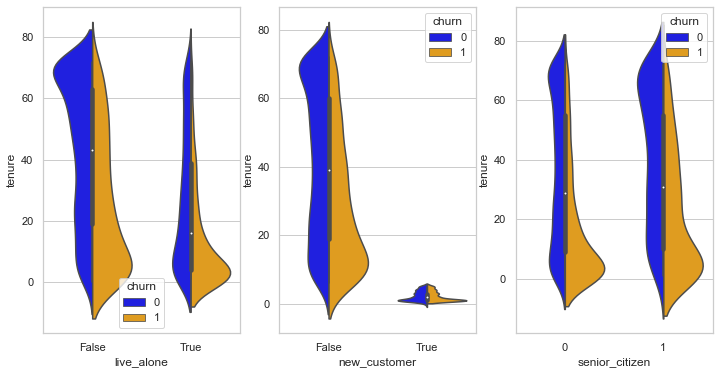

In [22]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for i, feature in enumerate(features):
    sns.violinplot(
        feature,
        "tenure",
        hue="churn",
        data=train,
        split=True,
        ax=ax[i],
        palette=["blue", "orange"],
    )

In [23]:
pd.crosstab(train.churn, train.live_alone)

#half of all customers who live alone churn

live_alone,False,True
churn,,
0,1676,1221
1,429,617


In [24]:
pd.crosstab(train.churn, train.new_customer)

#more new customer churn than stay 

new_customer,False,True
churn,,
0,2552,345
1,644,402


In [26]:
pd.crosstab(train.churn, train.senior_citizen)

# senior citizens are more likely to churn than not

senior_citizen,0,1
churn,,
0,2548,349
1,768,278


In [25]:
pd.crosstab(train.churn, train.tenure)

tenure,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
churn,,,,,,,,,,,,,,,,,,,,,
0,8,137,58,56,50,36,42,44,42,51,...,39,44,33,37,54,55,46,53,91,206
1,0,205,58,57,45,37,25,26,24,21,...,1,3,4,8,7,2,5,7,3,4


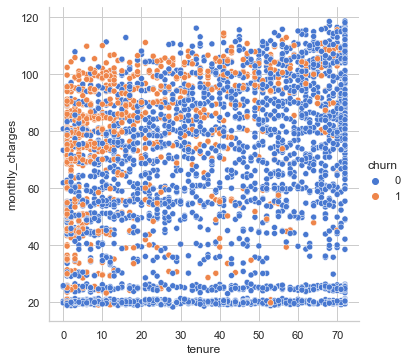

In [28]:
sns.relplot(x='tenure', y='monthly_charges', hue = 'churn' ,data=train)

# new customers with high monthly rates are likely to churn

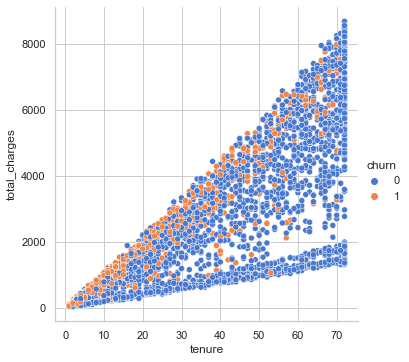

In [29]:
sns.relplot(x='tenure', y='total_charges', hue = 'churn' ,data=train)

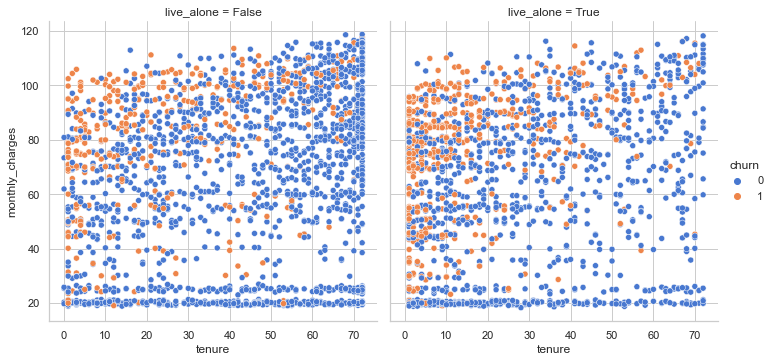

In [30]:
sns.relplot(x='tenure', y='monthly_charges', hue = 'churn', col = 'live_alone' ,data=train)

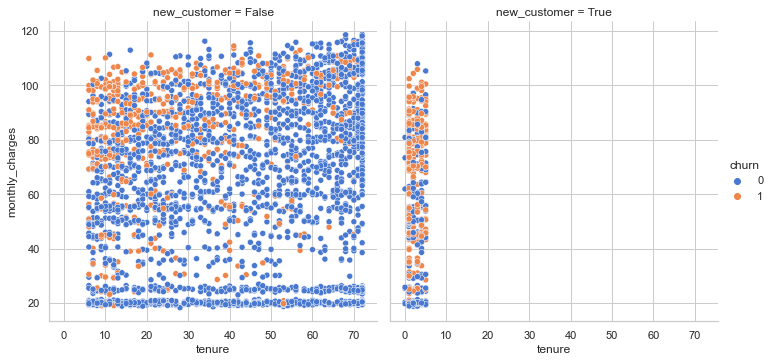

In [31]:
sns.relplot(x='tenure', y='monthly_charges', hue = 'churn', col = 'new_customer' ,data=train)

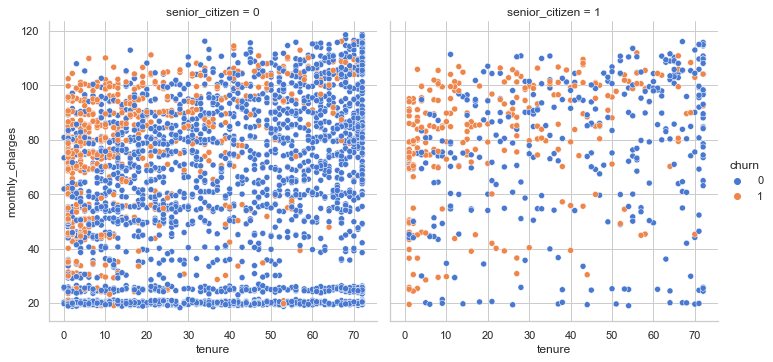

In [32]:
sns.relplot(x='tenure', y='monthly_charges', hue = 'churn', col = 'senior_citizen' ,data=train)

In [33]:
## new customers with high monthly rates are likely to churn regardless of other drivers of churn

In [38]:
from math import sqrt
from scipy import stats

In [41]:
# churn v tenure
## cat v continuous: t test

h0 = 'there is no difference in the tenure of customers who churn and customers who do not'

h1 = 'there is a difference in the tenure of customers who churn and customers who do not'

alpha = .05

In [40]:
x1 = train[train.churn == 1].tenure
x2 = train[train.churn != 1].tenure

xbar1 = x1.mean()
xbar2 = x2.mean()

n1 = x1.shape[0]
n2 = x2.shape[0]

s1 = x1.std()
s2 = x2.std()

degf = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))
t

-22.831587329281454

In [43]:
p = stats.t(degf).sf(t) * 2

print(f't = {t:.5f}')
print(f'p = {p:.5f}')

if p < alpha:
    print(h1)
else:
    print(h0)

t = -22.83159
p = 2.00000
there is no difference in the tenure of customers who churn and customers who do not


In [44]:
# churn v new customer
## cat v cat: chi square

h0 = 'there is no difference in the churn rate of new customers over tenured customers'

h1 = 'there is a difference in the churn rate of new customers over tenured customers'

alpha = .05

In [45]:
observed = pd.crosstab(train.churn, train.new_customer)

observed

new_customer,False,True
churn,,
0,2552,345
1,644,402


In [46]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < alpha:
    print(h1)
else:
    print(h0)

Observed

[[2552  345]
 [ 644  402]]
---
Expected

[[2348.16434187  548.83565813]
 [ 847.83565813  198.16434187]]
---

chi^2 = 350.3482
p     = 0.0000
there is a difference in the churn rate of new customers over tenured customers


In [47]:
# churn v live alone
## cat v cat: chi square

h0 = 'there is no difference in the churn rate of customers who live alone over customers who do not live alone'

h1 = 'there is a difference in the churn rate of customers who live alone over customers who do not live alone'

alpha = .05

In [48]:
observed = pd.crosstab(train.churn, train.live_alone)

observed

live_alone,False,True
churn,,
0,1676,1221
1,429,617


In [49]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < alpha:
    print(h1)
else:
    print(h0)

Observed

[[1676 1221]
 [ 429  617]]
---
Expected

[[1546.5850875 1350.4149125]
 [ 558.4149125  487.5850875]]
---

chi^2 = 86.8978
p     = 0.0000
there is a difference in the churn rate of customers who live alone over customers who do not live alone


In [50]:
# churn v senior
## cat v cat: chi square

h0 = 'there is no difference in the churn rate of customers who are senior citizens over those that are not'

h1 = 'there is a difference in the churn rate of customers who are senior citizens over those that are not'

alpha = .05

In [51]:
observed = pd.crosstab(train.churn, train.senior_citizen)

observed

senior_citizen,0,1
churn,,
0,2548,349
1,768,278


In [52]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < alpha:
    print(h1)
else:
    print(h0)

Observed

[[2548  349]
 [ 768  278]]
---
Expected

[[2436.33071266  460.66928734]
 [ 879.66928734  166.33071266]]
---

chi^2 = 120.2507
p     = 0.0000
there is a difference in the churn rate of customers who are senior citizens over those that are not
